In [1]:
from pgnano.stats_analysis.primitives import Histogram, PGPoreType
from pgnano.stats_analysis.jupyter_data_preparation import flatten_sample_data
from typing import Callable, List, Iterable, Tuple
from functools import partial
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [2]:
signal_data, chunk_data = flatten_sample_data(PGPoreType.P9_4_1,100)

['/data/datananoraw/data_analysis/9_4_1/0792a506-batch11.pod5', '/data/datananoraw/data_analysis/9_4_1/13ccd92f-batch33.pod5', '/data/datananoraw/data_analysis/9_4_1/16723ac7-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/23a8b088-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/3824828f-batch12.pod5', '/data/datananoraw/data_analysis/9_4_1/5524fc3c-batch13.pod5', '/data/datananoraw/data_analysis/9_4_1/6f82bcb6-batch28.pod5', '/data/datananoraw/data_analysis/9_4_1/93f9b40d-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/9a6e2862-batch36.pod5', '/data/datananoraw/data_analysis/9_4_1/af5138bf-batch7.pod5', '/data/datananoraw/data_analysis/9_4_1/b8feca29-batch25.pod5', '/data/datananoraw/data_analysis/9_4_1/bb5fa810-batch19.pod5', '/data/datananoraw/data_analysis/9_4_1/df68bb8f-batch3.pod5', '/data/datananoraw/data_analysis/9_4_1/e1e34260-batch11.pod5', '/data/datananoraw/data_analysis/9_4_1/e2564fd3-batch22.pod5']
[('/data/datananoraw/data_analysis/9_4_1/af5138bf-batch7

In [3]:
def transform_signal_to_error(signal: npt.NDArray[np.int16]) -> npt.NDArray[np.int16]:
    prediction = np.append([0], np.copy(signal[:-1]))
    assert(len(prediction) == len(signal))
    return signal - prediction

In [4]:
def transform_error_to_code(error: npt.NDArray[np.int16]) -> npt.NDArray[np.uint16]:
    vectorized = np.vectorize(lambda x: 2*x if x > 0 else (-(2*x)-1))
    return vectorized(error)

In [5]:
def split_symbol(x: np.int16, bit: np.integer) -> Tuple[np.int16]:
    low_mask: np.int16
    low_mask = (np.int16(1) << bit) - 1
    high_mask: np.int16
    high_mask = np.int16(0xFFFF) ^ low_mask
    return x & low_mask, (x & high_mask) >> bit

In [6]:
def get_splitted_histograms(signal: npt.NDArray[np.int16], bit: np.integer) -> Tuple[Histogram]:
    low_histogram = Histogram((1 << bit) - 1)
    high_histogram = Histogram((1 << (16 - bit)) - 1)
    f = partial(split_symbol, bit = bit)
    for low, high in map(f, signal):
        low_histogram[low] += 1
        high_histogram[high] += 1
    return low_histogram, high_histogram

In [7]:
def plot_histograms(low: Histogram, high: Histogram):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(low.get_data(), color='blue')
    axs[0].set_title('Low')
    axs[1].plot(high.get_data(), color='red')
    axs[1].set_title('High')
    

/tmp/ipykernel_2524247/3063061243.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 65535 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  high_mask = np.int16(0xFFFF) ^ low_mask


[12820  9799 10075  8684  8959  6511  5943  4558  4246  3030  2563  1867
  1694  1178  1043   812   786   564   512   449   462   353   358   322
   344   280   291   252   265   212   215   191   204   163   174   177
   188   143   137   142   132   117   127   107   122    92   102    88
   110   110    92    69    99    60    85    72    82    77    77    60
    63    52    51    49    75    37    44    41    50    40    57    39
    40    36    30    30    29    23    30    23    35    15    25    18
    20    14    16    13    23    15    13    15    18    10    11    15
    15     3     8     6     3     8     6     8    10     5     6     1
     4     5     2     4     4     3     1     4     3     4     1     1
     1     2     0     0     0     5     1     0     1     0     1     2
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     1     0     0     1     0
     0     0     1     1     0     0     0     0   

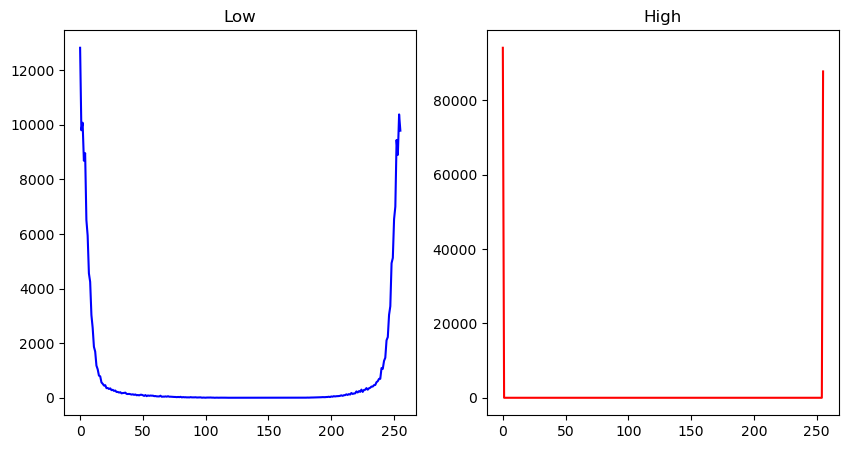

In [8]:
error = transform_signal_to_error(signal_data[0])
low_histogram, high_histogram = get_splitted_histograms(error,8)
plot_histograms(low_histogram, high_histogram)
print(low_histogram.get_data())

In [9]:
code = transform_error_to_code(error)

/tmp/ipykernel_2524247/3063061243.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 65535 to int16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  high_mask = np.int16(0xFFFF) ^ low_mask


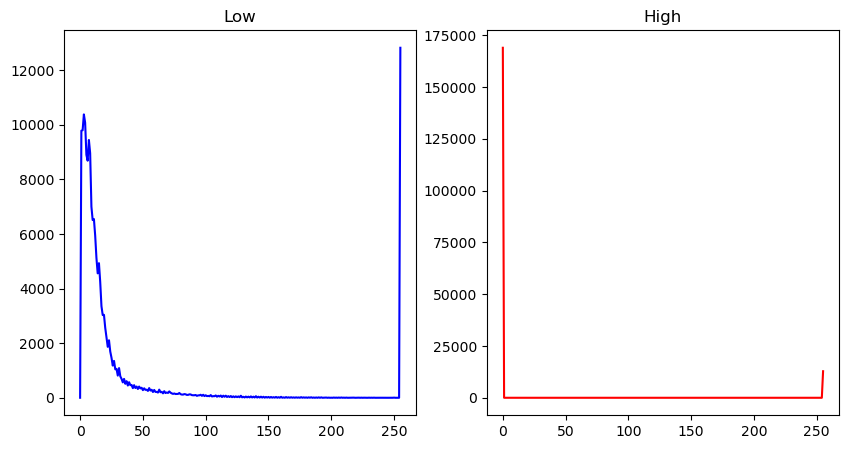

In [10]:
low_histogram, high_histogram = get_splitted_histograms(code,8)
plot_histograms(low_histogram, high_histogram)